In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import folium
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [ ]:
world = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
total_case = pd.read_csv("/content/total_cases.csv")
dff = pd.read_csv("/content/drive/My Drive/covid_19_data.csv")
dff.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [ ]:
world.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57389,NaN,NaN,International,2020-11-13,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,2020-11-14,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57393,NaN,NaN,International,2020-11-17,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
total_case.tail()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Sint Maarten (Dutch part),Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
276,2020-10-02,34370113,39285.0,13806.0,51690.0,2050.0,4972.0,3.0,106.0,764989.0,50850.0,3998.0,27096,46317,40309.0,4220.0,71374.0,364987.0,193.0,79019.0,128404,2026.0,2357.0,181.0,282.0,135716.0,106.0,27745.0,3172.0,4847092,71.0,146.0,21096.0,2088.0,510.0,277.0,20838.0,160535,6126.0,211.0,...,668.0,10938.0,5865.0,3593.0,676084.0,23952,2704.0,789932.0,3382.0,13653.0,4891.0,5500.0,94283.0,53712,4247.0,517,9811.0,509.0,3575.0,28.0,1809.0,4570.0,18413.0,320070.0,690.0,8287.0,208959.0,95348.0,460178,7277814,1326.0,2061.0,57454.0,12.0,76029.0,1095.0,766.0,2038.0,14802.0,7850.0
277,2020-10-03,34687237,39290.0,13965.0,51847.0,2110.0,5114.0,3.0,106.0,779676.0,51382.0,4038.0,27113,47189,40453.0,4220.0,71803.0,366383.0,193.0,79421.0,131094,2080.0,2357.0,181.0,283.0,136219.0,124.0,27745.0,3172.0,4880523,71.0,146.0,21336.0,2123.0,513.0,278.0,20924.0,162659,6205.0,213.0,...,674.0,11617.0,6103.0,3593.0,677833.0,24027,2715.0,789932.0,3388.0,13653.0,4899.0,5521.0,NaN,54263,4289.0,517,9852.0,509.0,3583.0,28.0,1818.0,4629.0,19721.0,321512.0,695.0,8491.0,217661.0,96529.0,467146,7332285,1326.0,2097.0,57776.0,12.0,76820.0,1096.0,766.0,2043.0,14830.0,7858.0
278,2020-10-04,34990354,39297.0,14117.0,51995.0,2110.0,5211.0,3.0,107.0,790805.0,51925.0,4074.0,27121,48019,40561.0,4409.0,72310.0,367565.0,196.0,79852.0,131871,2131.0,2357.0,181.0,283.0,136569.0,124.0,27971.0,3172.0,4906833,71.0,146.0,21518.0,2154.0,513.0,278.0,20924.0,164471,6296.0,213.0,...,678.0,12321.0,6330.0,3745.0,679716.0,24091,2715.0,789932.0,3396.0,13653.0,4924.0,5530.0,NaN,54263,4329.0,517,9895.0,509.0,3583.0,28.0,1840.0,4709.0,20944.0,323014.0,695.0,8662.0,222232.0,97760.0,480017,7382944,1327.0,2122.0,58421.0,12.0,76820.0,1096.0,766.0,2044.0,14974.0,7885.0
279,2020-10-05,35272552,39341.0,14266.0,52136.0,2110.0,5370.0,3.0,107.0,798473.0,52496.0,4079.0,27136,48618,40691.0,4409.0,72662.0,368690.0,199.0,80295.0,132109,2196.0,2357.0,181.0,298.0,136868.0,124.0,27975.0,3172.0,4915289,71.0,146.0,21587.0,2167.0,513.0,280.0,20924.0,166156,6360.0,213.0,...,679.0,13139.0,6498.0,3745.0,681289.0,24164,2726.0,813412.0,3402.0,13653.0,4941.0,5569.0,NaN,54263,4366.0,517,9935.0,509.0,3590.0,28.0,1854.0,4763.0,23453.0,324443.0,695.0,8808.0,226462.0,98801.0,502978,7417845,1327.0,2145.0,58859.0,12.0,78434.0,1096.0,766.0,2045.0,15052.0,7885.0
280,2020-10-06,35523518,39486.0,14410.0,52270.0,2370.0,5370.0,3.0,107.0,809715.0,52677.0,4079.0,27149,49886,40788.0,4559.0,73116.0,370132.0,200.0,80696.0,132109,2204.0,2357.0,181.0,299.0,137107.0,124.0,28449.0,3172.0,4927235,71.0,146.0,21870.0,2184.0,514.0,280.0,20924.0,168960,6433.0,213.0,...,686.0,13492.0,6574.0,3745.0,682215.0,24239,2726.0,NaN,3733.0,13653.0,4954.0,5579.0,NaN,55803,4411.0,518,9974.0,509.0,3600.0,28.0,1864.0,4767.0,23453.0,326046.0,695.0,8965.0,230236.0,99733.0,515571,7458550,1327.0,2155.0,58946.0,12.0,79117.0,1097.0,766.0,2045.0,15089.0,7898.0


In [ ]:
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df_confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43256,43664,43945,44299,44684,45200,45658,46100,46434,46746,47135,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672,57226,57657,58158,58838,59422,60065,60784,61514,62167,63031,63867
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2050,2051,2051,2052,2052,2053,2053,2053,2055,2055,2056,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063,2067,2070,2070,2071,2071,2071,2071,2072,2072,2072,2078
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15301,15339,15415,15458,15549,15587,15616,15659,15659,15789,15853,15897,15982,16000,16035,16095,16117,16117,16200,16243,16285,16325,16415,16432,16480,16543,16661,16698,16770,16819,16908,16954,16971,16997,17036,17056,17093,17097,17123,17187


In [ ]:
dff

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [ ]:
dff.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
...,...,...,...,...
09/19/2020,84189917,30688150.0,955866.0,20922189.0
09/20/2020,84740481,30935011.0,959565.0,21159459.0
09/21/2020,85406364,31245797.0,963693.0,21394593.0


In [ ]:
confirmed = dff.groupby('Date').sum()['Confirmed'].reset_index()
deaths = dff.groupby('Date').sum()['Deaths'].reset_index()
recovered = dff.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
...,...,...
241,09/19/2020,30688150.0
242,09/20/2020,30935011.0
243,09/21/2020,31245797.0
244,09/22/2020,31517087.0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

In [ ]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = dff.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [ ]:
fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

In [ ]:
india = world.loc[world["location"].isin(["India"])]

In [ ]:
india.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24323,IND,Asia,India,2020-11-13,8728795.0,44879.0,45295.857,128668.0,547.0,526.143,6325.194,32.521,32.823,93.237,0.396,0.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123101739.0,1139230.0,89.204,0.826,1096092.0,0.794,24.199,0.041,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24324,IND,Asia,India,2020-11-14,8773479.0,44684.0,44485.571,129188.0,520.0,518.000,6357.573,32.380,32.236,93.614,0.377,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124031230.0,929491.0,89.877,0.674,1069847.0,0.775,24.049,0.042,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24325,IND,Asia,India,2020-11-15,8814579.0,41100.0,43832.143,129635.0,447.0,502.000,6387.356,29.783,31.762,93.938,0.324,0.364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124836819.0,805589.0,90.461,0.584,1014290.0,0.735,23.140,0.043,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24326,IND,Asia,India,2020-11-16,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,6409.492,22.136,30.173,94.253,0.315,0.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24327,IND,Asia,India,2020-11-17,8874290.0,29163.0,40365.714,130519.0,449.0,494.286,6430.624,21.133,29.250,94.579,0.325,0.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [ ]:
total = total_case.fillna(0)
india = india.fillna(0)
df = india[["location", "total_cases"]]
df = df.reset_index()
df["index"] = df.index

In [ ]:
df

,index,location,total_cases
0,0,India,0.0
1,1,India,0.0
2,2,India,0.0
3,3,India,0.0
4,4,India,0.0
...,...,...,...
318,318,India,8728795.0
319,319,India,8773479.0
320,320,India,8814579.0
321,321,India,8845127.0


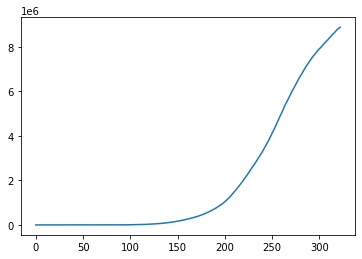

In [ ]:
plt.plot(df["total_cases"])
plt.show()

In [ ]:
X = np.array(df["index"]).reshape(-1, 1)
y = np.array(df["total_cases"]).reshape(-1, 1)

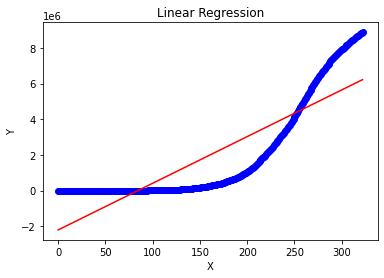

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin_reg.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('X') 
plt.ylabel('Y') 
  
plt.show() 

In [ ]:
svrr = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svrr.fit(X,y)
svrr.score(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9703437423058445

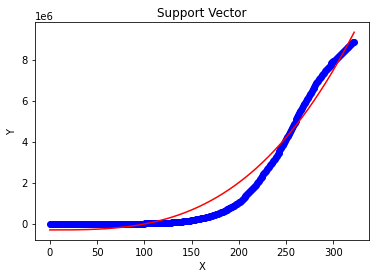

In [ ]:
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, svrr.predict(X), color = 'red') 
plt.title('Support Vector') 
plt.xlabel('X') 
plt.ylabel('Y') 
  
plt.show() 

In [ ]:

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
lin2.score(X_poly,y)

0.9939076982826374

Text(0, 0.5, 'Y')

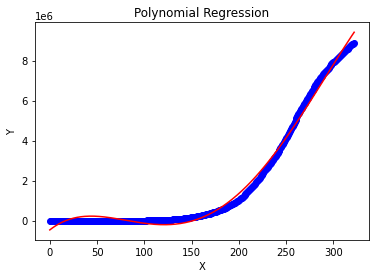

In [ ]:
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('X') 
plt.ylabel('Y')

In [ ]:
df['index'].count()

323

In [ ]:
import scipy.stats as stats

from scipy.stats import ttest_1samp

In [ ]:
ttest,p_value=ttest_1samp(y,10)
print(p_value)

[6.9945845e-30]


In [ ]:
df

,index,location,total_cases
0,0,India,0.0
1,1,India,0.0
2,2,India,0.0
3,3,India,0.0
4,4,India,0.0
...,...,...,...
318,318,India,8728795.0
319,319,India,8773479.0
320,320,India,8814579.0
321,321,India,8845127.0


In [ ]:
df.drop(['Sno'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
df['Total cases'] = df['ConfirmedIndianNational'] + df['ConfirmedForeignNational']
total_cases = df['Total cases'].sum()
#print('Total number of confirmed COVID 2019 cases across India till date :', total_cases)

In [ ]:
df.style.background_gradient(cmap='Reds')

In [ ]:

print('Total number of deaths COVID 2019 cases across India:', df['Deaths'].sum())
Tot_Cases = df.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

In [ ]:
India_coord = pd.read_excel("/quadinate.csv.xlsx")

In [ ]:
India_coord

In [ ]:
India_coord = India_coord.rename(columns={"capital": "State/UnionTerritory"})

In [ ]:
India_coord = India_coord[["lat","long","State/UnionTerritory"]]

In [ ]:
India_coord

In [ ]:
df_full.tail()

In [ ]:

import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
import plotly.express as px
fig = px.bar(df, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:
confirmed = world.groupby('date').sum()['total_cases'].reset_index()
deaths = world.groupby('date').sum()['total_deaths'].reset_index()
tt = world.groupby('date').sum()['total_tests'].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['total_cases'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['total_deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=tt['date'], y=tt['total_tests'], mode='lines+markers', name='tests', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))


fig.show()